## Done by -> Abhishek Kulkarni

### Titanic Survival Prediction using Logistic regression

Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read titanic dataset
df_og = pd.read_csv(r"C:\Users\amkb2\Downloads\titanic\train.csv")

In [2]:
# Data Analysis
df_og.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# searching for null values
df_og.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Remove null values
df = df_og.dropna()

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [6]:
# split the data set into train and test sets remove any non-numeric columns
x,y = df_og.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','Survived']),df_og['Survived']
x=x.replace({'male':0,'female':1}).fillna(0)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

print('size of x_train')
print(x_train.shape)
print('size of x_test')
print(x_test.shape)

size of x_train
(596, 6)
size of x_test
(295, 6)


In [7]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


Text(0, 0.5, 'Survival rate')

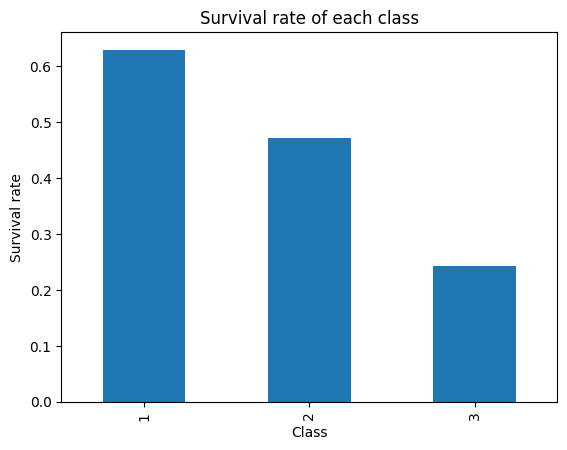

In [8]:
# Plot the survival rate of each class,gender,age,embarked,etc
# 1. Survival rate of each class
df_og.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival rate of each class')
plt.xlabel('Class')
plt.ylabel('Survival rate')


let's implement logistic regression

In [9]:
def generateXvector(x):
    """
    Taking the original ind var matrix & add a row of 1 which corresponds to x_0
    Parameters:
        x:ind var matrix
    return value:the matrix that contains all the values in the dataset,not include the outcome var
    """
    vectorx=np.c_[np.ones((len(x),1)),x]
    return vectorx
def beta_init(x):
    """Generate an initial val of betas from org ind var matrix
        Parameters:
            x:ind var matrix
        Return val:a vector of beta filled with initial guess
    """
    beta=np.random.randn((x.shape[1])+1,1)
    return beta
def sigmoid_function(x):
    """
    Cal sig val of inputs
    Param:
        x:val
    returnval:the sigmoid val
    """
    return 1/(1+math.e**(-x))
def Logistics_Regression(x,y,learningrate,iterations):
    """
    Find the logistic reg model for data set 
    Parameters:
        x:ind var matrix
        y:dependent var matrix
        learningrate:learningrate of Gradient descent
        iterations:the no. of iterations
    Return val:the final beta vector & the plot of cost function
    """
    y_new=y.values.reshape((len(y),1))
    cost_lst=[]
    vectorx=generateXvector(x)
    beta=beta_init(x)
    m=len(x)
    for i in range(iterations):
        gradients=2/m*vectorx.T.dot(sigmoid_function(vectorx.dot(beta))-y_new)
        beta=beta-learningrate*gradients
        y_pred=sigmoid_function(vectorx.dot(beta))
        cost_value=-np.sum(np.dot(y_new.T,np.log(y_pred)+np.dot((1-y_new).T,np.log(1-y_pred))))/(len(y_pred))
    # cal the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:],color='red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return beta
    

In [10]:
beta=Logistics_Regression(x_train,y_train,0.01,10000)

SKlearn implementation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
classifier=LogisticRegression(random_state=0,penalty='none')
classifier.fit(x_train,y_train)
classifier.intercept_,classifier.coef_

C:\Users\amkb2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


(array([-0.68088451]),
 array([[-0.6580703 ,  1.24922165, -0.18441534, -0.32395783, -0.08816187,
          0.20435519]]))

In [ ]:
y_pred=classifier.predict(x_train)
accuracy_score(y_train,y_pred)


0.7969798657718121

In [ ]:
# for test set
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.8067796610169492

In [ ]:
confusion_matrix(y_test,y_pred)

array([[156,  19],
       [ 38,  82]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

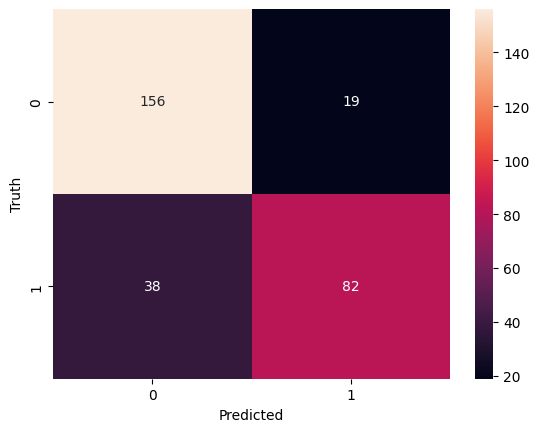

In [ ]:
# heatmap
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


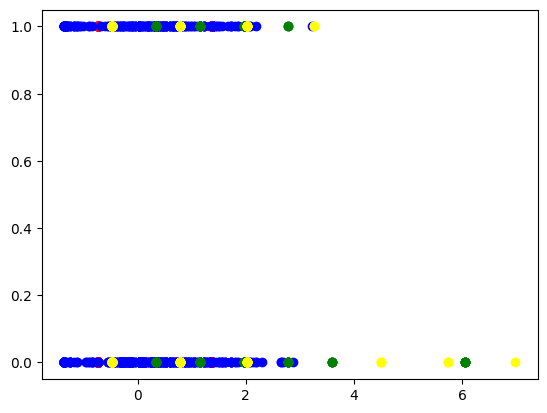

In [ ]:
# Plot scatter plot of the data set
plt.scatter(x_train[:,1],y_train,color='red')
plt.scatter(x_train[:,2],y_train,color='blue')
plt.scatter(x_train[:,3],y_train,color='green')
plt.scatter(x_train[:,4],y_train,color='yellow')


